<a href="https://colab.research.google.com/github/kaytlyn724/MAT422/blob/main/HW1.4_Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.4 Principle Component Analysis**

---

### **Key Concepts:**

*   1.4.1. Singular value decomposition
*   1.4.2. Low-rank matrix approximations
*   1.4.3. Principal component analysis

In [15]:
### important imports to run code ###

import numpy as np
import matplotlib.pyplot as plt
#import sympy
#from numpy.linalg import qr
#from sklearn.linear_model import LinearRegression

## **1.4.1. Singular Value Decomposition**

**Singular Value Decomposition:** Every matrix $A∈ℝ^{m×n}$ can be factorized as:

$A=UΣV^T$
*   $U∈ℝ^{m×m}$ : An orthogonal matrix whose columns are the left singular vectors of $A$.
*   $Σ∈ℝ^{m×n}$ : A diagonal matrix whose diagonal entries are the singular values $σ_1,...,σ_r$​.
*   $V^T∈ℝ^{n×n}$ : An orthogonal matrix whose columns are the right singular vectors of $A$.
*   The Singular Value Decomposition (or SVD) allows us to decompose the matrix into simpler orthogonal components, to better understand and visualize.

In [2]:
# Create a generic example matrix A of m x n
A = np.array([[1, 5, 9],
              [3, 0, 9],
              [14, 2, 10]])

print("Original matrix A:\n", A)

# Break up that matrix A into the 3 parts discussed above
U, S, VT = np.linalg.svd(A)

# Convert the singular values array (S) into a diagonal matrix Σ (m x n)
# We do this by creating an m x n matrix filled with zeros and
# then we fill the diagonal with the singular values
convert = np.zeros((A.shape[0], A.shape[1]))
np.fill_diagonal(convert, S)

# Reconstruct the original matrix A by multiplying U, Σ, and V^T (to show that it works)
A_reconstructed = np.round(np.dot(U, np.dot(convert, VT)), 0)

# Show the results of the SVD
print("Singular Value Decompositions:\n")
print("U matrix made up of the Left singular vectors:\n", U)
print("Singular values made up of the Diagonal of Σ:\n", S)
print("V^T matrix made up of the Right singular vectors:\n", VT)
print("\nReconstructed matrix A:\n", A_reconstructed)

Original matrix A:
 [[ 1  5  9]
 [ 3  0  9]
 [14  2 10]]
Singular Value Decompositions:

U matrix made up of the Left singular vectors:
 [[-0.40269732 -0.75579612 -0.51634009]
 [-0.42127225 -0.34777178  0.8376064 ]
 [-0.81262818  0.5548216  -0.17834917]]
Singular values made up of the Diagonal of Σ:
 [20.613645    7.87182248  3.17994506]
V^T matrix made up of the Right singular vectors:
 [[-0.6327512  -0.17652108 -0.75396699]
 [ 0.75819684 -0.33910031 -0.5569098 ]
 [-0.15736412 -0.92404074  0.34840385]]

Reconstructed matrix A:
 [[ 1.  5.  9.]
 [ 3. -0.  9.]
 [14.  2. 10.]]


## **1.4.2. Low-Rank Matrix Approximations**

**Low-Rank Matrix Approximations:** Aims to approximate $A$ by truncating its singular values, retaining only the largest $k$ singular values, and setting the rest to zero. This results in a matrix $A_k$ with rank $k$, which approximates the original matrix while reducing complexity.

Given the SVD of a matrix $A$:

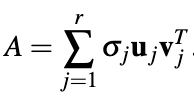

We can approximate $A$ by truncating the sum to the first $k$-terms:

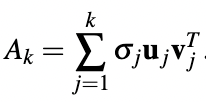

The rank of $A_k$ is exactly $k$.



In [16]:
# Create a generic example matrix A of m x n
A = np.array([[1, 5, 9],
              [3, 0, 9],
              [14, 2, 10]])

print("Original matrix A:\n", A)

# Next steps are the same as what we did earlier with the Singular Value Decomposition
# Break up that matrix A into the 3 parts discussed above
U, S, VT = np.linalg.svd(A)

# Convert the singular values array (S) into a diagonal matrix Σ (m x n)
convert = np.zeros((A.shape[0], A.shape[1]))
np.fill_diagonal(convert, S)

# Reconstruct the rank-2 approximation by using only the first 2 singular values
# Zero out all but the first k singular values
# the higher the k, the less of an error you will get
k = 2
conv_k = convert.copy()
conv_k[k:, k:] = 0

# Reconstruct the original matrix A by multiplying U, Σ, and V^T (to show that it works)
A_reconstructed = np.round(np.dot(U, np.dot(conv_k, VT)), 0)

# Step 6: Show the results
print("\nRank-2 approximation of matrix A (A_k):\n", A_reconstructed)

# Step 7: Calculate the error in the 2-norm
error = np.round(np.linalg.norm(A - A_reconstructed, 2), 4)
print("2-norm of the error between the original matrix A \n and the reconstructed matrix A_reconstructed: ", error)

Original matrix A:
 [[ 1  5  9]
 [ 3  0  9]
 [14  2 10]]

Rank-2 approximation of matrix A (A_k):
 [[ 1.  3. 10.]
 [ 3.  2.  8.]
 [14.  1. 10.]]
2-norm of the error between the original matrix A 
 and the reconstructed matrix A_reconstructed:  3.2886


## **1.4.3. Principal Component Analysis**

**Principal Component Analysis:** Principal component analysis is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data’s variation as possible. Its underlying mathematics can be explained with singular value decomposition.

**Covariance Matrix:** Describes the variance and the relationships between variables, measuring how much variables change together. Key component in Principal Component Analysis because it finds the directions where the data changes the most.
$ M = 1/(N-1)BB^T$

Where B is the centered matrix.

**Total Variance:** The sum of the variances along each principal component, representing the spread in all directions. Usually in Principal Component Analysis we want to find the total variance of the top k principal components.

$Total$ $Variance = $ 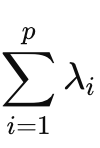

Original matrix X:
 [[ 1  5  9]
 [ 3  0  9]
 [14  2 10]
 [ 4  6  8]
 [10 12  7]
 [ 9  3  6]]

Matrix X after mean has been subtracted:
 [[-5.83333333  0.33333333  0.83333333]
 [-3.83333333 -4.66666667  0.83333333]
 [ 7.16666667 -2.66666667  1.83333333]
 [-2.83333333  1.33333333 -0.16666667]
 [ 3.16666667  7.33333333 -1.16666667]
 [ 2.16666667 -1.66666667 -2.16666667]]

Matrix X's covariance matrix :
 [[24.56666667  2.53333333 -0.56666667]
 [ 2.53333333 17.46666667 -2.73333333]
 [-0.56666667 -2.73333333  2.16666667]]

Eigenvalues:
 [25.46124577 17.04643739  1.69231684]

Eigenvectors:
 [[ 0.94538201  0.32591638  0.005601  ]
 [ 0.32028586 -0.93196867  0.16985688]
 [-0.06057909  0.15878572  0.98545282]]

Total Variance: 44.2
Variance explained by top 2 components: 42.50768315659426
Fraction of variance explained by top 2 components: 0.9617

Principal components (top 2):
 [[ 0.94538201  0.32591638]
 [ 0.32028586 -0.93196867]
 [-0.06057909  0.15878572]]


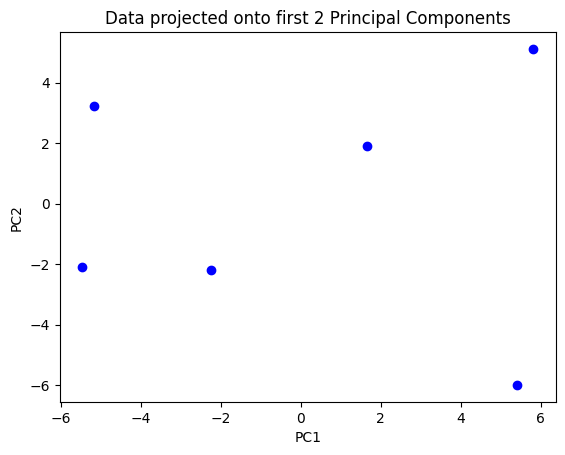

In [24]:
# Create a generic example matrix A of m x n
X = np.array([[1, 5, 9],
              [3, 0, 9],
              [14, 2, 10],
              [4, 6, 8],
              [10, 12, 7],
              [9, 3, 6]])

print("Original matrix X:\n", X)

# Subtract the mean of each row from the matrix
mean = np.mean(X, axis=0, keepdims=True)
# New matrix with it subtracted from the original
new_X = X - mean

print("\nMatrix X after mean has been subtracted:\n", new_X)

# Find the Covariance matrix
covariance = np.dot(new_X.T, new_X) / (new_X.shape[0] - 1)

print("\nMatrix X's covariance matrix :\n", covariance)

# Perform eigenvalue decomposition on the covariance matrix from before
eigenvalues, eigenvectors = np.linalg.eig(covariance)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvals = eigenvalues[sorted_indices]
sorted_eigenvecs = eigenvectors[:, sorted_indices]

print(f"\nEigenvalues:\n", sorted_eigenvals)
print(f"\nEigenvectors:\n", sorted_eigenvecs)

# Calculate the Total Variance using the eigenvalues
total_variance = np.sum(sorted_eigenvals)
print("\nTotal Variance:", total_variance)

# Then calculate the variance explained by the top k components
explained_variance = np.sum(sorted_eigenvals[:k])
variance_fraction = explained_variance / total_variance

print(f"Variance explained by top {k} components: {explained_variance}")
print(f"Fraction of variance explained by top {k} components: {variance_fraction:.4f}\n")

# Project the data onto the top k principal components using k=2
k = 2
eigenvecs_k = sorted_eigenvecs[:, :k]
X_projected = np.dot(new_X, eigenvecs_k)

print(f"Principal components (top {k}):\n", eigenvecs_k)

# Plot the data to show the dots corresponding to the data
# points after they have been transformed. Because they are spread out
# It shows that there is some variance and it is captured
plt.scatter(X_projected[:, 0], X_projected[:, 1], c='blue')
plt.title(f"Data projected onto first {k} Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()